<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Nov10-11/NN_1_sklearn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos que vamos a trabajar.

In [ ]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/DCI_data/ML2023/CAT_DOG/train/*')

In [ ]:
len(files)

4340

In [ ]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset

In [ ]:
#We use firt 500 for test
X=[]
Y=[]
nimages=150
for file in files[:nimages]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    X.append(data)
    img.close()
    if 'dog' in file:
        Y.append(int(1))
    if 'cat' in file:
        Y.append(int(0))
X=np.asarray(X)
Y=np.asarray(Y)

In [ ]:
Y

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

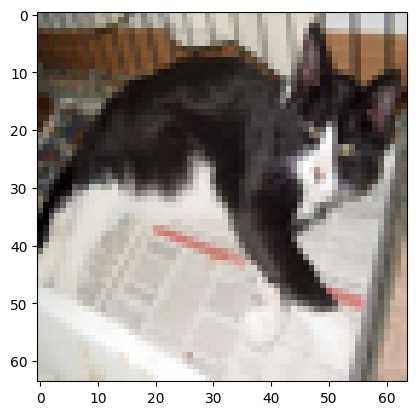

In [ ]:
plt.imshow(X[5])


Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [ ]:
X_flatten = X.reshape(X.shape[0], -1).T

Normalizamos los datos

In [ ]:
scaler=preprocessing.StandardScaler().fit(X_flatten)
X_scaled = scaler.transform(X_flatten)

Preparamos el dataset de entrenamiento y de prueba

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled.T,Y, test_size=0.15, random_state=42)

In [ ]:
x_train.shape,x_test.shape

((127, 12288), (23, 12288))

In [ ]:
### Using sklearn
from sklearn.neural_network import MLPClassifier


In [ ]:
regr = MLPClassifier(hidden_layer_sizes=1, activation='logistic',solver='sgd',random_state=1).fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred_test=regr.predict(x_test)

In [ ]:
regr.score(x_test, y_test)

0.6086956521739131

y = 0, you predicted that it is a "1


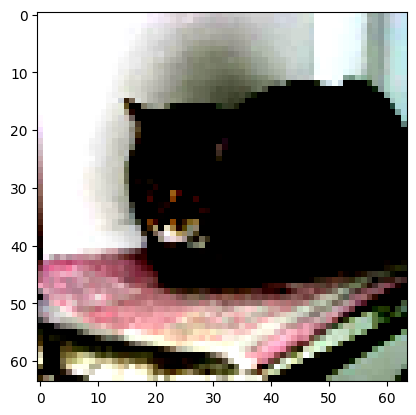

In [ ]:
index=np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[index]) + ", you predicted that it is a \"" + str(y_pred_test[index]))

In [ ]:
###Using Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(1, activation='sigmoid', name = 'layer1')
     ]
)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 12289     
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

model.fit(
    x_train,y_train,
    epochs=100,
)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4010 - binary_accuracy: 0.4961
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3124 - binary_accuracy: 0.5827
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6629 - binary_accuracy: 0.7008
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5427 - binary_accuracy: 0.7874
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7777 - binary_accuracy: 0.6929
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2112 - binary_accuracy: 0.8976
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1884 - binary_accuracy: 0.9370
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1008 - binary_accuracy: 0.9764
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0905 - binary_accuracy: 0.9843
Epoch 10/100
4/4 [==============================] - 0s 3ms/step 

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test = (y_pred_test >= 0.5).astype(int)


1/1 [==============================] - 0s 149ms/step


y = 1, you predicted that it is a "[1]


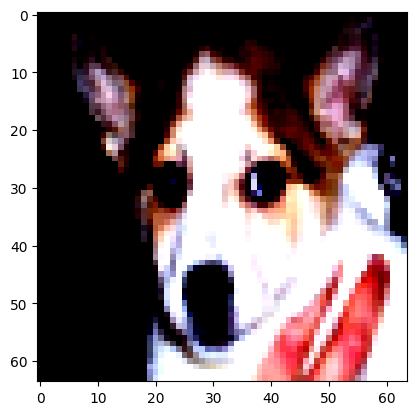

In [ ]:
index=np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[index]) + ", you predicted that it is a \"" + str(y_pred_test[index]))

:Ya esta listo nuestro set de datos para poder trabajar con el.

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("accuracy in train set: ", lr_model.score(x_train,y_train))
print("accuracy in test set: ", lr_model.score(x_test,y_test))

accuracy in train set:  1.0
accuracy in test set:  0.6956521739130435


In [ ]:
y_pred_test=lr_model.predict(x_test)

y = 1, you predicted that it is a "1


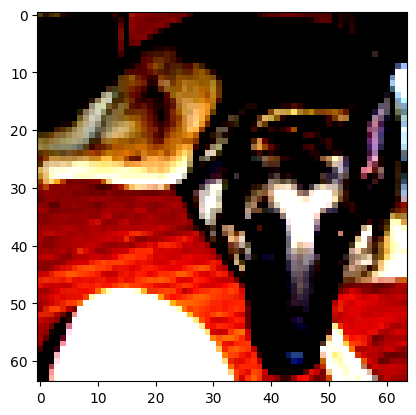